This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2019). For additional details, please see the attached data dictionary in the ‘About’ section.

link: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [1]:
pip install sodapy

## 1 - Extração e carregamento dos dados.

In [2]:
from sodapy import Socrata
import pandas as pd
import numpy as np
import datetime as dt
import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#  Example authenticated client (needed for non-public datasets):
# https://data.cityofnewyork.us/resource/qgea-i56i.json
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:


client = Socrata("data.cityofnewyork.us", None)

In [4]:
# results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("qgea-i56i", limit=750000)

In [5]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [6]:
results_df.head()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,loc_of_occur_desc,prem_typ_desc,juris_desc,jurisdiction_code,housing_psa,x_coord_cd,y_coord_cd,susp_age_group,susp_race,susp_sex,latitude,longitude,lat_lon,patrol_boro,vic_age_group,vic_race,vic_sex,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,cmplnt_to_dt,cmplnt_to_tm,parks_nm,hadevelopt,transit_district,station_name
0,700381962,2015-05-28T00:00:00.000,15:00:00,46,2015-06-01T00:00:00.000,578,HARRASSMENT 2,638,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,NA,1007522,247458,25-44,BLACK,M,40.84586773,-73.915888033,"{'latitude': '40.84586773', 'longitude': '-73....",PATROL BORO BRONX,25-44,WHITE HISPANIC,F,10930,6,5,29,29,NaN,NaN,NaN,NaN,NaN,NaN
1,642234217,2013-10-28T00:00:00.000,13:50:00,120,2013-10-28T00:00:00.000,351,CRIMINAL MISCHIEF & RELATED OF,259,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",COMPLETED,MISDEMEANOR,STATEN ISLAND,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,NA,962835,167738,NaN,NaN,NaN,40.627060894,-74.077149232,"{'latitude': '40.627060894', 'longitude': '-74...",PATROL BORO STATEN ISLAND,45-64,WHITE,M,10691,4,1,13,74,2013-10-28T00:00:00.000,13:50:00,NA,NaN,NaN,NaN
2,242465164,2012-05-09T00:00:00.000,20:50:00,24,2012-05-09T00:00:00.000,236,DANGEROUS WEAPONS,782,"WEAPONS, POSSESSION, ETC",COMPLETED,MISDEMEANOR,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0,NA,992820,231089,NaN,NaN,NaN,40.800965968,-73.969047272,"{'latitude': '40.800965968', 'longitude': '-73...",PATROL BORO MAN NORTH,NaN,UNKNOWN,E,12422,20,4,19,15,2012-05-09T00:00:00.000,21:00:00,NA,NaN,NaN,NaN
3,927207428,2014-01-03T00:00:00.000,13:30:00,108,2014-01-03T00:00:00.000,109,GRAND LARCENY,409,"LARCENY,GRAND BY EXTORTION",ATTEMPTED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,NA,1013552,210803,NaN,UNKNOWN,M,40.745241809,-73.894253382,"{'latitude': '40.745241809', 'longitude': '-73...",PATROL BORO QUEENS NORTH,45-64,ASIAN / PACIFIC ISLANDER,M,14787,53,3,33,66,2014-01-03T00:00:00.000,13:35:00,NaN,NaN,NaN,NaN
4,492142357,2016-04-13T00:00:00.000,00:00:00,40,2016-04-13T00:00:00.000,351,CRIMINAL MISCHIEF & RELATED OF,258,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,BRONX,NaN,HIGHWAY/PARKWAY,N.Y. POLICE DEPT,0,NA,1005028,234516,NaN,NaN,NaN,40.810351863,-73.924942326,"{'latitude': '40.810351863', 'longitude': '-73...",PATROL BORO BRONX,UNKNOWN,UNKNOWN,E,10932,49,5,35,23,NaN,NaN,NaN,NaN,NaN,NaN


## 2 - Tratamento dos dados.

- Neste tópico será feito um tratamento de dados, com exclusão, modificação do  tipo e conteúdo de algumas colunas.


In [7]:
drop_columns=['cmplnt_num','addr_pct_cd','ky_cd','pd_cd','juris_desc','jurisdiction_code','housing_psa','x_coord_cd','y_coord_cd','lat_lon',':@computed_region_efsh_h5xi',
              ':@computed_region_f5dn_yrer',':@computed_region_yeji_bk3q',':@computed_region_92fq_4b7q',':@computed_region_sbqj_enih']

In [8]:
results_df.drop(columns=drop_columns,axis=1,inplace=True)

In [9]:
results_df.columns=['data_da_ocorr','hora_da_ocorr','data_com_policia','delito',
                    'desc_delito','conclusao','nivel_delito','bairro','loc_esp_delito','desc_instalacoes',
                    'idade_susp','raca_susp','sexo_susp','latitude','longitude','patrol_boro','idade_vit','raca_vit','sexo_vit',
                    'data_final_ocorr','hora_termino_ocorr','parque','conj_hab','transit_district','rua_av']

In [10]:
results_df.head()

,data_da_ocorr,hora_da_ocorr,data_com_policia,delito,desc_delito,conclusao,nivel_delito,bairro,loc_esp_delito,desc_instalacoes,idade_susp,raca_susp,sexo_susp,latitude,longitude,patrol_boro,idade_vit,raca_vit,sexo_vit,data_final_ocorr,hora_termino_ocorr,parque,conj_hab,transit_district,rua_av
0,2015-05-28T00:00:00.000,15:00:00,2015-06-01T00:00:00.000,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,25-44,BLACK,M,40.84586773,-73.915888033,PATROL BORO BRONX,25-44,WHITE HISPANIC,F,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-10-28T00:00:00.000,13:50:00,2013-10-28T00:00:00.000,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",COMPLETED,MISDEMEANOR,STATEN ISLAND,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,40.627060894,-74.077149232,PATROL BORO STATEN ISLAND,45-64,WHITE,M,2013-10-28T00:00:00.000,13:50:00,NA,NaN,NaN,NaN
2,2012-05-09T00:00:00.000,20:50:00,2012-05-09T00:00:00.000,DANGEROUS WEAPONS,"WEAPONS, POSSESSION, ETC",COMPLETED,MISDEMEANOR,MANHATTAN,NaN,STREET,NaN,NaN,NaN,40.800965968,-73.969047272,PATROL BORO MAN NORTH,NaN,UNKNOWN,E,2012-05-09T00:00:00.000,21:00:00,NA,NaN,NaN,NaN
3,2014-01-03T00:00:00.000,13:30:00,2014-01-03T00:00:00.000,GRAND LARCENY,"LARCENY,GRAND BY EXTORTION",ATTEMPTED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,NaN,UNKNOWN,M,40.745241809,-73.894253382,PATROL BORO QUEENS NORTH,45-64,ASIAN / PACIFIC ISLANDER,M,2014-01-03T00:00:00.000,13:35:00,NaN,NaN,NaN,NaN
4,2016-04-13T00:00:00.000,00:00:00,2016-04-13T00:00:00.000,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,BRONX,NaN,HIGHWAY/PARKWAY,NaN,NaN,NaN,40.810351863,-73.924942326,PATROL BORO BRONX,UNKNOWN,UNKNOWN,E,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1 **Criando novas colunas a partir da data da ocorrência.**

In [11]:
results_df = results_df.dropna(subset=['data_da_ocorr'])

In [12]:
# crinado novas variáveis referentes a data da ocorrencia.

def date_to_weekday(date):
    weekday_dict = {0:'segunda', 1:'terca', 2: 'quarta', 3: 'quinta', 4: 'sexta', 5: 'sabado', 6: 'domingo'}
    date_time_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
    return weekday_dict[date_time_obj.weekday()]

In [13]:
date = results_df['data_da_ocorr'].str.split('T',expand=True, n=1)[0]
date_1 = date.str.split("-", n = 3, expand = True)
results_df['ano'] = date_1[0].astype('int32')
results_df['mes'] = date_1[1].astype('int32')
results_df['dia'] = date_1[2].astype('int32')
results_df['dia_da_semana'] = date.apply(date_to_weekday)

In [14]:
results_df.head(3)

,data_da_ocorr,hora_da_ocorr,data_com_policia,delito,desc_delito,conclusao,nivel_delito,bairro,loc_esp_delito,desc_instalacoes,idade_susp,raca_susp,sexo_susp,latitude,longitude,patrol_boro,idade_vit,raca_vit,sexo_vit,data_final_ocorr,hora_termino_ocorr,parque,conj_hab,transit_district,rua_av,ano,mes,dia,dia_da_semana
0,2015-05-28T00:00:00.000,15:00:00,2015-06-01T00:00:00.000,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,BRONX,INSIDE,RESIDENCE - APT. HOUSE,25-44,BLACK,M,40.84586773,-73.915888033,PATROL BORO BRONX,25-44,WHITE HISPANIC,F,NaN,NaN,NaN,NaN,NaN,NaN,2015,5,28,quinta
1,2013-10-28T00:00:00.000,13:50:00,2013-10-28T00:00:00.000,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",COMPLETED,MISDEMEANOR,STATEN ISLAND,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,40.627060894,-74.077149232,PATROL BORO STATEN ISLAND,45-64,WHITE,M,2013-10-28T00:00:00.000,13:50:00,NA,NaN,NaN,NaN,2013,10,28,segunda
2,2012-05-09T00:00:00.000,20:50:00,2012-05-09T00:00:00.000,DANGEROUS WEAPONS,"WEAPONS, POSSESSION, ETC",COMPLETED,MISDEMEANOR,MANHATTAN,NaN,STREET,NaN,NaN,NaN,40.800965968,-73.969047272,PATROL BORO MAN NORTH,NaN,UNKNOWN,E,2012-05-09T00:00:00.000,21:00:00,NA,NaN,NaN,NaN,2012,5,9,quarta


### 2.2 **Criando uma cópia do dataframe original.**

In [15]:
df = results_df.copy()

In [16]:
df = df[['data_da_ocorr','hora_da_ocorr','dia','mes','dia_da_semana','ano',
         'delito','desc_delito','nivel_delito','conclusao',
         'idade_susp','raca_susp','sexo_susp','bairro','patrol_boro','loc_esp_delito','desc_instalacoes',
         'parque','conj_hab','transit_district','rua_av',
         'latitude','longitude','idade_vit','raca_vit','sexo_vit',
          ]]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749981 entries, 0 to 749999
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   data_da_ocorr     749981 non-null  object
 1   hora_da_ocorr     749981 non-null  object
 2   dia               749981 non-null  int32 
 3   mes               749981 non-null  int32 
 4   dia_da_semana     749981 non-null  object
 5   ano               749981 non-null  int32 
 6   delito            749095 non-null  object
 7   desc_delito       749500 non-null  object
 8   nivel_delito      749981 non-null  object
 9   conclusao         749981 non-null  object
 10  idade_susp        405867 non-null  object
 11  raca_susp         488738 non-null  object
 12  sexo_susp         488724 non-null  object
 13  bairro            749489 non-null  object
 14  patrol_boro       749483 non-null  object
 15  loc_esp_delito    602127 non-null  object
 16  desc_instalacoes  746899 non-null  obj

In [18]:
df.head()

,data_da_ocorr,hora_da_ocorr,dia,mes,dia_da_semana,ano,delito,desc_delito,nivel_delito,conclusao,idade_susp,raca_susp,sexo_susp,bairro,patrol_boro,loc_esp_delito,desc_instalacoes,parque,conj_hab,transit_district,rua_av,latitude,longitude,idade_vit,raca_vit,sexo_vit
0,2015-05-28T00:00:00.000,15:00:00,28,5,quinta,2015,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,COMPLETED,25-44,BLACK,M,BRONX,PATROL BORO BRONX,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,NaN,40.84586773,-73.915888033,25-44,WHITE HISPANIC,F
1,2013-10-28T00:00:00.000,13:50:00,28,10,segunda,2013,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",MISDEMEANOR,COMPLETED,NaN,NaN,NaN,STATEN ISLAND,PATROL BORO STATEN ISLAND,INSIDE,RESIDENCE - APT. HOUSE,NA,NaN,NaN,NaN,40.627060894,-74.077149232,45-64,WHITE,M
2,2012-05-09T00:00:00.000,20:50:00,9,5,quarta,2012,DANGEROUS WEAPONS,"WEAPONS, POSSESSION, ETC",MISDEMEANOR,COMPLETED,NaN,NaN,NaN,MANHATTAN,PATROL BORO MAN NORTH,NaN,STREET,NA,NaN,NaN,NaN,40.800965968,-73.969047272,NaN,UNKNOWN,E
3,2014-01-03T00:00:00.000,13:30:00,3,1,sexta,2014,GRAND LARCENY,"LARCENY,GRAND BY EXTORTION",FELONY,ATTEMPTED,NaN,UNKNOWN,M,QUEENS,PATROL BORO QUEENS NORTH,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,NaN,40.745241809,-73.894253382,45-64,ASIAN / PACIFIC ISLANDER,M
4,2016-04-13T00:00:00.000,00:00:00,13,4,quarta,2016,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",MISDEMEANOR,COMPLETED,NaN,NaN,NaN,BRONX,PATROL BORO BRONX,NaN,HIGHWAY/PARKWAY,NaN,NaN,NaN,NaN,40.810351863,-73.924942326,UNKNOWN,UNKNOWN,E


- Convertendo a coluna "**data_da_ocorr**"  pro formato datetime e selecionando os registros dos últimos 5 anos.

In [19]:
df['data_da_ocorr'] = pd.to_datetime(df['data_da_ocorr'], format=r'%Y-%m-%d', errors='coerce')

In [20]:
display(df['data_da_ocorr'].dt.year.min())
display(df['data_da_ocorr'].dt.year.max())

1912.0

2019.0

In [21]:
df = df[df['ano'] >= 2015]

In [22]:
df.shape

(515489, 26)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515489 entries, 0 to 749999
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   data_da_ocorr     515489 non-null  datetime64[ns]
 1   hora_da_ocorr     515489 non-null  object        
 2   dia               515489 non-null  int32         
 3   mes               515489 non-null  int32         
 4   dia_da_semana     515489 non-null  object        
 5   ano               515489 non-null  int32         
 6   delito            515293 non-null  object        
 7   desc_delito       515172 non-null  object        
 8   nivel_delito      515489 non-null  object        
 9   conclusao         515489 non-null  object        
 10  idade_susp        368321 non-null  object        
 11  raca_susp         383823 non-null  object        
 12  sexo_susp         383823 non-null  object        
 13  bairro            515165 non-null  object        
 14  patr

- Tratando os dados das colunas "**conclusao**", "**nivel_delito**" e "**loc_esp_delito**".

In [24]:
#  alterando os dados de  select_ny['conclusao']
new_conclusao = {'ATTEMPTED': 0, 'COMPLETED': 1 }
df['conclusao'] = df['conclusao'].map(new_conclusao)

# alterando os dados de  df['nivel_de_ofensa']
new_nivel_delito = {'MISDEMEANOR': "contravencao", 'FELONY': "crime", 'VIOLATION': "violacao" }
df['nivel_delito'] = df['nivel_delito'].map(new_nivel_delito)


# alterando os dados de  df['local_da_ocorrencia'], dentro ou fora dos estabelecimentos 
new_local_esp_delito = {'INSIDE': "dentro", 'FRONT OF': "fora", 'OPPOSITE OF': "fora", 
                           'REAR OF': "fora", 'OUTSIDE': "fora" }
df['loc_esp_delito'] = df['loc_esp_delito'].map(new_local_esp_delito)

# alterando os dados da coluna bairro

new_bairro = {'BRONX': 'Bronx', 'STATEN ISLAND': 'Staten_Island', 'BROOKLYN': 'Brooklyn', 'MANHATTAN': 'Manhattan' , 'QUEENS': 'Queens' }
df['bairro'] = df['bairro'].map(new_bairro)

- Selecionando apenas os delitos mais praticados.

In [25]:
df.delito.value_counts().head(10)

PETIT LARCENY                     93992
HARRASSMENT 2                     76305
ASSAULT 3 & RELATED OFFENSES      58800
CRIMINAL MISCHIEF & RELATED OF    52996
GRAND LARCENY                     47095
OFF. AGNST PUB ORD SENSBLTY &     23118
FELONY ASSAULT                    22989
DANGEROUS DRUGS                   19133
MISCELLANEOUS PENAL LAW           15669
ROBBERY                           15190
Name: delito, dtype: int64

In [26]:
select = list(dict(df.delito.value_counts().head(10)).keys())

In [27]:
df = df.set_index('delito')
df = df.loc[select]
df = df.reset_index()

In [28]:
df.shape

(425287, 26)

## 3 - Criando novas features.

- Criando features referentes a hora da ocorrência.

In [29]:
df['noite'] = df['hora_da_ocorr'].apply(lambda x: 0 if x <'17:59:59' and x >'05:59:59' else 1)


- Criando a variável assalto.


**ASSAULT 3 & RELATED OFFENSES/ FELONY ASSAULT:**

agressão agravada ou agressão envolve circunstâncias que tornam o crime mais grave, como quando a vítima é ameaçada ou experimenta violência significativa que atinge substancialmente mais do que um tapa leve.


**ROBBERY/BURGLARY:**

a ação de tomar bens ilegalmente de uma pessoa ou lugar pela força ou ameaça de força.


**GRAND LARCENY/ GRAND LARCENY OF MOTOR VEHICLE:**

Grande furto/roubo/assalto.

In [30]:
df['assalto'] = df['delito'].apply(lambda x: 1 if x=='FELONY ASSAULT' or x=='ASSAULT 3 & RELATED OFFENSES' or x =='ROBBERY' or x=='BURGLARY' or x=='GRAND LARCENY' or x=='GRAND LARCENY OF MOTOR VEHICLE'  else 0)

- Criando a variável final de semana.

In [31]:
df['fds'] = df['dia_da_semana'].apply(lambda x: 1 if x=='sabado' or x =='domigo' else 0)

# 4 - Machine Learning

## 4.1 Pre-processamento dos dados.

In [32]:
df.columns

Index(['delito', 'data_da_ocorr', 'hora_da_ocorr', 'dia', 'mes',
       'dia_da_semana', 'ano', 'desc_delito', 'nivel_delito', 'conclusao',
       'idade_susp', 'raca_susp', 'sexo_susp', 'bairro', 'patrol_boro',
       'loc_esp_delito', 'desc_instalacoes', 'parque', 'conj_hab',
       'transit_district', 'rua_av', 'latitude', 'longitude', 'idade_vit',
       'raca_vit', 'sexo_vit', 'noite', 'assalto', 'fds'],
      dtype='object')

In [33]:
df.head()

,delito,data_da_ocorr,hora_da_ocorr,dia,mes,dia_da_semana,ano,desc_delito,nivel_delito,conclusao,idade_susp,raca_susp,sexo_susp,bairro,patrol_boro,loc_esp_delito,desc_instalacoes,parque,conj_hab,transit_district,rua_av,latitude,longitude,idade_vit,raca_vit,sexo_vit,noite,assalto,fds
0,PETIT LARCENY,2017-03-26,12:00:00,26,3,domingo,2017,"LARCENY,PETIT FROM STORE-SHOPL",contravencao,1,25-44,WHITE,F,Brooklyn,PATROL BORO BKLYN SOUTH,dentro,CHAIN STORE,NaN,NaN,NaN,NaN,40.63125716,-73.945996398,UNKNOWN,UNKNOWN,D,0,0,0
1,PETIT LARCENY,2015-10-28,13:30:00,28,10,quarta,2015,"LARCENY,PETIT FROM STORE-SHOPL",contravencao,1,25-44,BLACK,F,Brooklyn,PATROL BORO BKLYN NORTH,dentro,RESTAURANT/DINER,NaN,NaN,NaN,NaN,40.693043457,-73.928276577,UNKNOWN,UNKNOWN,D,0,0,0
2,PETIT LARCENY,2016-10-11,22:00:00,11,10,terca,2016,"LARCENY,PETIT FROM BUILDING,UN",contravencao,1,NaN,NaN,NaN,Manhattan,PATROL BORO MAN SOUTH,dentro,RESTAURANT/DINER,NaN,NaN,NaN,NaN,40.736218594,-73.990984024,45-64,WHITE,F,1,0,0
3,PETIT LARCENY,2016-05-20,18:30:00,20,5,sexta,2016,"LARCENY,PETIT FROM STORE-SHOPL",contravencao,1,45-64,WHITE HISPANIC,M,Queens,PATROL BORO QUEENS NORTH,dentro,DEPARTMENT STORE,NaN,NaN,NaN,NaN,40.757379417,-73.834019371,UNKNOWN,UNKNOWN,D,1,0,0
4,PETIT LARCENY,2015-12-18,12:00:00,18,12,sexta,2015,"LARCENY,PETIT FROM OPEN AREAS,",contravencao,1,NaN,NaN,NaN,Queens,PATROL BORO QUEENS SOUTH,fora,RESIDENCE-HOUSE,NaN,NaN,NaN,NaN,40.720096196,-73.8052338,45-64,ASIAN / PACIFIC ISLANDER,M,0,0,0


- Renomeando o df.

In [34]:
dados = df[['data_da_ocorr','dia', 'mes', 'dia_da_semana','fds',
        'conclusao', 
       'bairro','desc_instalacoes',
       'latitude', 'longitude', 'noite',
       'assalto'
          
          ]]

In [35]:
dados = dados.sort_values('data_da_ocorr', ascending=True)

In [36]:
dados.head()

,data_da_ocorr,dia,mes,dia_da_semana,fds,conclusao,bairro,desc_instalacoes,latitude,longitude,noite,assalto
241102,2015-01-01,1,1,quinta,0,1,Queens,STREET,40.74360542,-73.920986473,1,0
372731,2015-01-01,1,1,quinta,0,1,Queens,RESIDENCE-HOUSE,40.699868955,-73.825103142,1,1
322759,2015-01-01,1,1,quinta,0,1,Bronx,RESIDENCE - APT. HOUSE,40.831733432,-73.913481179,1,1
273394,2015-01-01,1,1,quinta,0,1,Manhattan,STREET,40.791915591,-73.944432345,0,0
232042,2015-01-01,1,1,quinta,0,1,Manhattan,STREET,40.791915591,-73.944432345,0,0


In [37]:
dados = dados.reset_index(drop=True)

In [38]:
dados.assalto.value_counts()

0    281213
1    144074
Name: assalto, dtype: int64

- Tratando variáveis categóricas.

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
enconder = LabelEncoder()

In [41]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425287 entries, 0 to 425286
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   data_da_ocorr     425287 non-null  datetime64[ns]
 1   dia               425287 non-null  int32         
 2   mes               425287 non-null  int32         
 3   dia_da_semana     425287 non-null  object        
 4   fds               425287 non-null  int64         
 5   conclusao         425287 non-null  int64         
 6   bairro            425281 non-null  object        
 7   desc_instalacoes  423786 non-null  object        
 8   latitude          425287 non-null  object        
 9   longitude         425287 non-null  object        
 10  noite             425287 non-null  int64         
 11  assalto           425287 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(4), object(5)
memory usage: 35.7+ MB


In [42]:
dados['bairro'] = dados['bairro'].astype(str)
dados['desc_instalacoes'] = dados['desc_instalacoes'].astype(str)

In [43]:
dados['bairro_id'] = enconder.fit_transform(dados['bairro'])	
dados['desc_instalacoes_id'] = enconder.fit_transform(dados['desc_instalacoes'])
dados['dia_da_semana_id'] = enconder.fit_transform(dados['dia_da_semana'])

In [44]:
dados.head()

,data_da_ocorr,dia,mes,dia_da_semana,fds,conclusao,bairro,desc_instalacoes,latitude,longitude,noite,assalto,bairro_id,desc_instalacoes_id,dia_da_semana_id
0,2015-01-01,1,1,quinta,0,1,Queens,STREET,40.74360542,-73.920986473,1,0,3,62,2
1,2015-01-01,1,1,quinta,0,1,Queens,RESIDENCE-HOUSE,40.699868955,-73.825103142,1,1,3,55,2
2,2015-01-01,1,1,quinta,0,1,Bronx,RESIDENCE - APT. HOUSE,40.831733432,-73.913481179,1,1,0,53,2
3,2015-01-01,1,1,quinta,0,1,Manhattan,STREET,40.791915591,-73.944432345,0,0,2,62,2
4,2015-01-01,1,1,quinta,0,1,Manhattan,STREET,40.791915591,-73.944432345,0,0,2,62,2


### Selecionando apenas os delitos classificados como assalto.

In [45]:
assaltos = dados.query('assalto==1')

In [46]:
assaltos = assaltos.sort_values('data_da_ocorr', ascending=True)

In [47]:
assaltos = assaltos.reset_index(drop=True)

In [48]:
assaltos['data_da_ocorr'].dt.year.value_counts()

2019    84288
2015    19541
2016    19466
2017    18653
2018     2126
Name: data_da_ocorr, dtype: int64

### Selecionando as features para modelagem.

In [49]:
dados_ml = assaltos.drop(columns=['data_da_ocorr','assalto','dia_da_semana','bairro','desc_instalacoes','fds'])

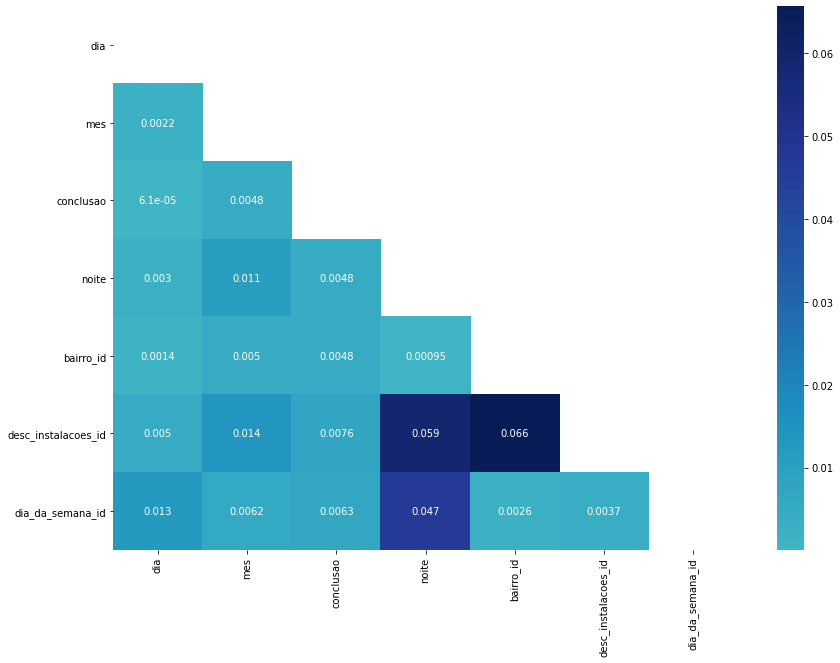

In [50]:
plt.figure(figsize=(14,10))

corr = dados_ml.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

In [51]:
dados_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144074 entries, 0 to 144073
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dia                  144074 non-null  int32 
 1   mes                  144074 non-null  int32 
 2   conclusao            144074 non-null  int64 
 3   latitude             144074 non-null  object
 4   longitude            144074 non-null  object
 5   noite                144074 non-null  int64 
 6   bairro_id            144074 non-null  int64 
 7   desc_instalacoes_id  144074 non-null  int64 
 8   dia_da_semana_id     144074 non-null  int64 
dtypes: int32(2), int64(5), object(2)
memory usage: 8.8+ MB


In [52]:
dados_ml['latitude'] = dados_ml['latitude'].astype(float)
dados_ml['longitude'] = dados_ml['longitude'].astype(float)

In [53]:
dados_ml['conclusao'].value_counts(normalize=True)

1    0.970189
0    0.029811
Name: conclusao, dtype: float64

In [54]:
X = dados_ml.drop(columns=['conclusao'],axis=1)
Y = dados_ml['conclusao']

 ### Balanceando os dados.

In [55]:
# from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [56]:
s= SMOTE(sampling_strategy=0.5)

In [57]:
X,Y = s.fit_sample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [58]:
np.bincount(Y)

array([ 69889, 139779])

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

## 4.2 **Testando algoritmos**

In [61]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

A acurácia do dummy mostfrequent foi 66.67%


Text(33.0, 0.5, 'Real ( 1 ou 0)')

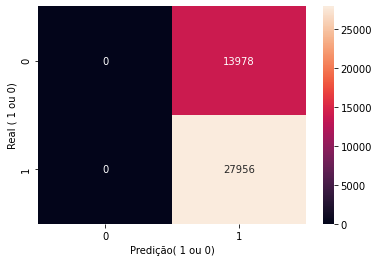

In [62]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [63]:
y_proba= dummy_clf.predict_proba(X_teste)[:,1]

In [64]:
from sklearn.metrics import  roc_auc_score,roc_curve, classification_report
from sklearn import metrics

y_proba = dummy_clf.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:,1])

0.5

In [65]:
print(classification_report(Y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13978
           1       0.67      1.00      0.80     27956

    accuracy                           0.67     41934
   macro avg       0.33      0.50      0.40     41934
weighted avg       0.44      0.67      0.53     41934



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **KNNCLassifier**

In [66]:
from sklearn.neighbors import KNeighborsClassifier


In [67]:
knn = KNeighborsClassifier(n_neighbors=1)


In [68]:
knn.fit(X_treino,Y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [69]:
knn.score(X_teste,Y_teste)

0.9374254781323031

In [70]:
y_pred = knn.predict(X_teste)

In [71]:
y_proba = knn.predict_proba(X_teste)[:,1]

In [72]:
roc_auc = roc_auc_score(Y_teste, y_proba)
roc_auc

0.9411396480183143

Text(33.0, 0.5, 'Real ( 1 ou 0)')

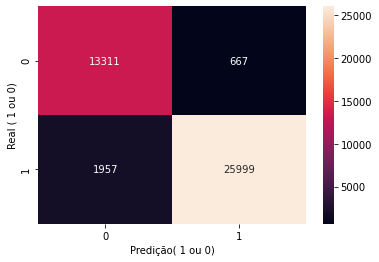

In [73]:
cm=confusion_matrix(Y_teste, y_proba>0.5)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [74]:
print(classification_report(Y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     13978
           1       0.97      0.93      0.95     27956

    accuracy                           0.94     41934
   macro avg       0.92      0.94      0.93     41934
weighted avg       0.94      0.94      0.94     41934



### Triagem com outros modelos

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lista_classificacores = [ LogisticRegression(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         XGBClassifier()]

for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)

  print('Acuracia')
  train_acc = clf.score(X_treino, Y_treino)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

LogisticRegression
Acuracia
Treino: 0.6666686539401672
Teste: 0.6666666666666666
ROC AUC
Treino 0.5205267457505893
Test 0.5194313510585621
DecisionTreeClassifier
Acuracia
Treino: 0.9993978561293476
Teste: 0.9410025277817523
ROC AUC
Treino 0.9999991750818914
Test 0.93640821294694
RandomForestClassifier
Acuracia
Treino: 0.9993918943088461
Teste: 0.9694519959937044
ROC AUC
Treino 0.9999968955408571
Test 0.9855741743546023
XGBClassifier
Acuracia
Treino: 0.9238794758367415
Teste: 0.9222349406209758
ROC AUC
Treino 0.9559817973613345
Test 0.9527261924237546


- Validação cruzada.

In [76]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
lista_classificacores = [ LogisticRegression(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         XGBClassifier()]


for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)
  train_acc = clf.score(X_treino, Y_treino)
  val_score = cross_val_score(clf, X_treino, Y_treino, cv=5)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Validation score', val_score.mean())
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

LogisticRegression
Treino: 0.6666686539401672
Validation score 0.6666686539283194
Teste: 0.6666666666666666
ROC AUC
Treino 0.5205267457505893
Test 0.5194313510585621
DecisionTreeClassifier
Treino: 0.9993978561293476
Validation score 0.937299544510992
Teste: 0.9407640578051223
ROC AUC
Treino 0.9999991750818914
Test 0.9360315837566713
RandomForestClassifier
Treino: 0.9993978561293476
Validation score 0.9671026811502603
Teste: 0.9694043019983785
ROC AUC
Treino 0.9999963275749428
Test 0.985229222449414
XGBClassifier
Treino: 0.9238794758367415
Validation score 0.9276175737489781
Teste: 0.9222349406209758
ROC AUC
Treino 0.9559817973613345
Test 0.9527261924237546


### **Ajustando o melhor modelo e avaliando as métricas.**

In [77]:
clf = RandomForestClassifier(n_estimators=350, max_depth=15)

In [78]:
clf.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
y_pred = clf.predict(X_teste)

- Avaliando as métricas

Text(33.0, 0.5, 'Real ( 1 ou 0)')

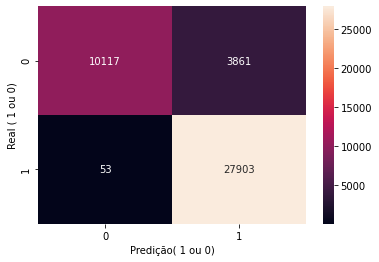

In [80]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [81]:
print(classification_report(Y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.72      0.84     13978
           1       0.88      1.00      0.93     27956

    accuracy                           0.91     41934
   macro avg       0.94      0.86      0.89     41934
weighted avg       0.92      0.91      0.90     41934



In [82]:
y_proba = clf.predict_proba(X_teste)[:,1]
roc_auc = roc_auc_score(Y_teste, y_proba)
roc_auc

0.9675592766107262

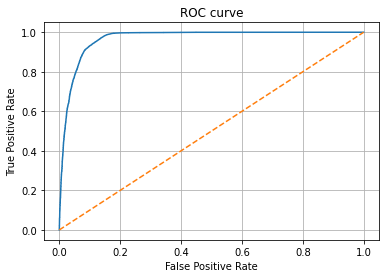

In [83]:
fpr, tpr, thresholds = metrics.roc_curve(Y_teste, y_proba)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

 - Visualizando árvore de decisão de baixa profundidade.

ROC AUC de Teste é RandomForestClassifier é 96.76%


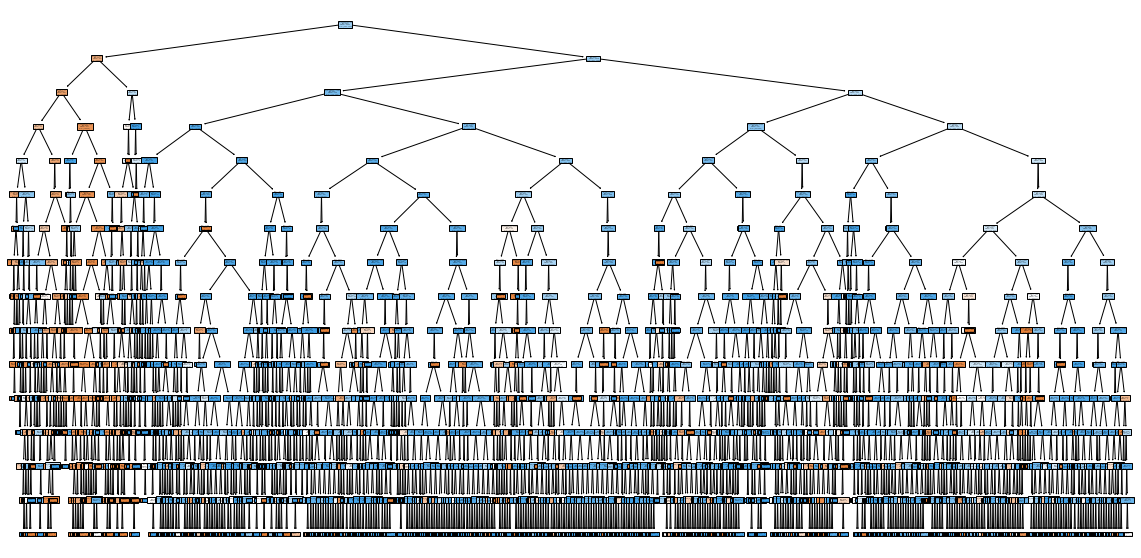

In [84]:
from sklearn.tree import plot_tree


print(f'ROC AUC de Teste é {clf.__class__.__name__} é {roc_auc*100:.2f}%')

plt.figure(figsize=(20,10))
annotations = plot_tree(clf.estimators_[0],
                        feature_names=dados_ml.drop('conclusao',axis=1).columns,
                        filled=True)

 - Salvando o modelo

In [85]:
import pickle

output = open('classificacao_assalto', 'wb')
pickle.dump(clf, output)
output.close()